In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


#### Splitting Data

In [7]:
x = df.drop(['target'], axis = 1)
y = df.target.values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

### Random Forest

In [9]:
RFC = RandomForestClassifier(n_estimators = 2000, min_samples_split= 2, min_samples_leaf = 1, max_depth = 25).fit(x_train, y_train)

In [10]:
# predict
yp_RFC = RFC.predict(x_test) 

In [12]:
cm_RFC = confusion_matrix(y_test,yp_RFC)
cm_RFC

array([[24,  3],
       [ 4, 30]], dtype=int64)

In [17]:
labels = ['No Disease', 'Have Disease']

              precision    recall  f1-score   support

  No Disease       0.86      0.89      0.87        27
Have Disease       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



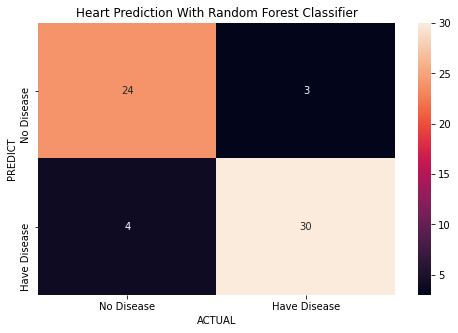

In [18]:
print(classification_report(y_test, yp_RFC, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Heart Prediction With Random Forest Classifier')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [19]:
print(RFC.score(x_test,y_test))

0.8852459016393442


### K-Nearest Neighbors

In [24]:
# k-value
k = round(len(x_train)**0.5)+1
k

17

In [25]:
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

In [26]:
yp_KNN = KNN.predict(x_test) 

In [28]:
cm_KNN = confusion_matrix(y_test,yp_KNN)
cm_KNN

array([[19,  8],
       [ 9, 25]], dtype=int64)

              precision    recall  f1-score   support

  No Disease       0.68      0.70      0.69        27
Have Disease       0.76      0.74      0.75        34

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



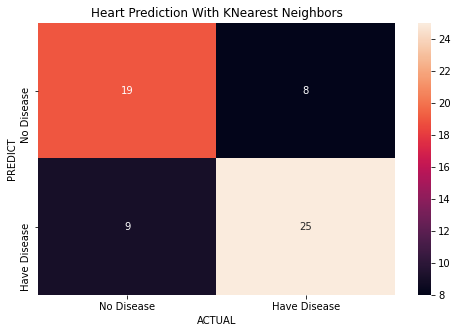

In [29]:
print(classification_report(y_test, yp_KNN, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Heart Prediction With KNearest Neighbors')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [31]:
print(KNN.score(x_test,y_test))

0.7213114754098361


### SUMMARY

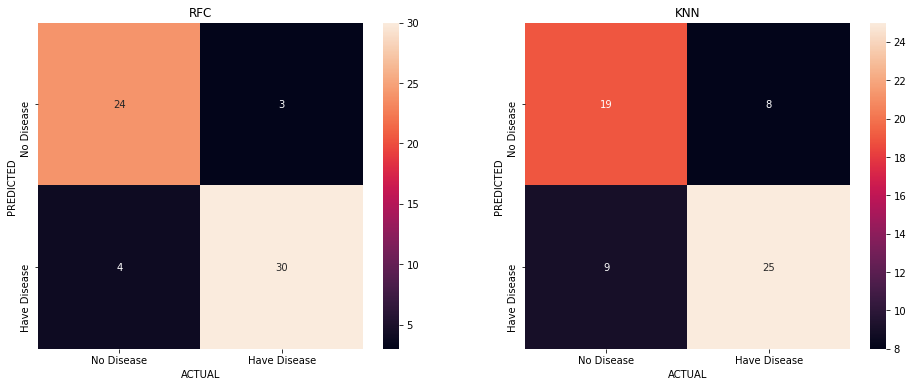

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax2)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('RFC'), ax2.set_title('KNN')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax2.set_ylabel('PREDICTED')

plt.show()

In [32]:
print('RFC Model : ', RFC.score(x_test,y_test))
print('KNN Model : ', KNN.score(x_test,y_test))

RFC Model :  0.8852459016393442
KNN Model :  0.7213114754098361
